## Series Prediction For Sine Wave

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split

2025-03-06 15:18:58.479726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741292338.591372  841559 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741292338.635220  841559 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
window_size = 5
periods = 20
sample_size = 1000

In [3]:
x_single_points = np.linspace(0, 2 * periods * np.pi, sample_size)
y = np.sin(x_single_points)
x = np.array([y[i - window_size:i] for i in range(window_size, sample_size)])
#first y value to use is window_size
y = y[window_size:]

In [4]:
x.shape, y.shape

((995, 5), (995,))

In [5]:
x.shape

(995, 5)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model = Sequential([
    Input(shape=(window_size,)),
    Dense(1)
])

I0000 00:00:1741292350.689403  841559 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2256 MB memory:  -> device: 0, name: NVIDIA T500, pci bus id: 0000:01:00.0, compute capability: 7.5


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(x_train.reshape(-1, window_size), y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


I0000 00:00:1741292354.977145  841617 service.cc:148] XLA service 0x7f3f84006a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741292354.977291  841617 service.cc:156]   StreamExecutor device (0): NVIDIA T500, Compute Capability 7.5
I0000 00:00:1741292355.175439  841617 cuda_dnn.cc:529] Loaded cuDNN version 90300


19/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4927 - mse: 3.4927

I0000 00:00:1741292355.774944  841617 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 3.5017 - mse: 3.5017 - val_loss: 3.6064 - val_mse: 3.6064
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.2718 - mse: 3.2718 - val_loss: 3.3070 - val_mse: 3.3070
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.0596 - mse: 3.0596 - val_loss: 3.0258 - val_mse: 3.0258
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7501 - mse: 2.7501 - val_loss: 2.7650 - val_mse: 2.7650
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5665 - mse: 2.5665 - val_loss: 2.5211 - val_mse: 2.5211
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.3081 - mse: 2.3081 - val_loss: 2.2929 - val_mse: 2.2929
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0924 - mse: 2.0924 - val_loss: 2.0788 - val_mse: 2.0788
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8401 - mse: 1.8401 - val_loss: 1.8831 - val_mse: 1.8831
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.7705 - mse: 1.

In [10]:
model.evaluate(x_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.4628 - mse: 0.4628


[0.45974239706993103, 0.45974239706993103]

In [11]:
from tqdm import tqdm
import numpy as np

prediction_amount = 300
batch_size = 10 
x_seed = y[:window_size]
predictions = []

sliding_window = x_seed[-window_size:].reshape(1, window_size)

num_batches = prediction_amount // batch_size
remaining_predictions = prediction_amount % batch_size

for _ in tqdm(range(num_batches)):
    batch_windows = np.zeros((batch_size, window_size))
    for i in range(batch_size):
        batch_windows[i] = sliding_window
        next_pred = model.predict(sliding_window, verbose=0)
        sliding_window = np.roll(sliding_window, -1, axis=1)
        sliding_window[0, -1] = next_pred

    batch_predictions = model.predict(batch_windows, verbose=0)
    
    predictions.extend(batch_predictions[:, 0])

if remaining_predictions > 0:
    batch_windows = np.zeros((remaining_predictions, window_size))
    for i in range(remaining_predictions):
        batch_windows[i] = sliding_window
        next_pred = model.predict(sliding_window, verbose=0)
        sliding_window = np.roll(sliding_window, -1, axis=1)
        sliding_window[0, -1] = next_pred

    batch_predictions = model.predict(batch_windows, verbose=0)
    predictions.extend(batch_predictions[:, 0])

predictions = np.array(predictions)

  0%|          | 0/30 [00:00<?, ?it/s]/tmp/ipykernel_841559/3157833656.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sliding_window[0, -1] = next_pred
100%|██████████| 30/30 [02:23<00:00,  4.77s/it]


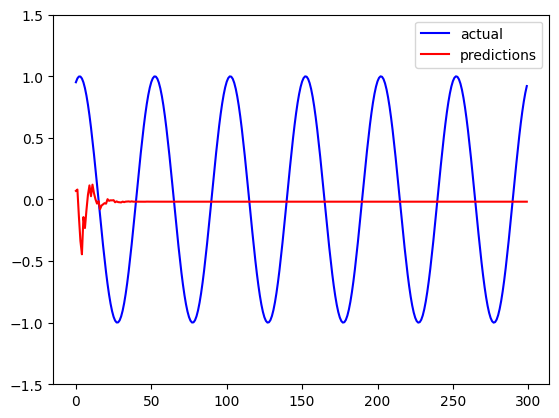

In [12]:
plt.plot(y[window_size:prediction_amount + window_size], color='blue', label='actual')
plt.plot(predictions, color='red', label='predictions')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()